<a href="https://colab.research.google.com/github/piyush1856/machine-learning-algorithms/blob/main/09_knn/knn_class_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part - 1

## EDA

In [1]:
import pandas as pd
import numpy as np

!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 31.0MB/s]


In [2]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


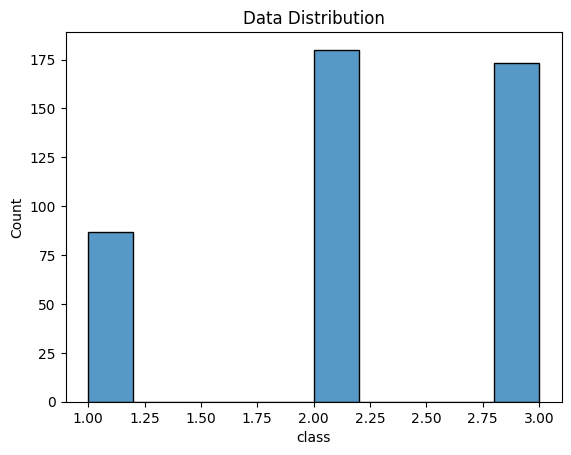

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="class")
plt.title('Data Distribution')
plt.show()

In [4]:
X=df[['Region', 'Fresh',    'Milk', 'Grocery',  'Frozen',   'Detergents_Paper', 'Delicassen'    ]].copy()
y=df[['class']].copy()

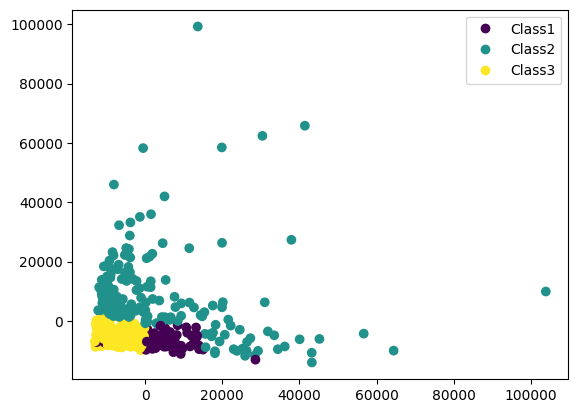

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def scatter_visualize(visualize1,visualize2,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

# reducing features to just 2 features for visualization purpose
pca = PCA(n_components=2)
visualize = pca.fit_transform(X)


scatter_visualize(visualize[:,0] ,visualize[:,1],y.values[:,0])

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(264, 7) (264, 1)
(88, 7) (88, 1)
(88, 7) (88, 1)


## Rebalancing Dataset

In [9]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

y_sm.value_counts()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


,count
class,
1,108
2,108
3,108


## Rescaling

In [10]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()

X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]

## KNN

In [11]:
# Query Point
X_val_scaled[18]

array([ 0.71783111,  0.11840185, -0.42775672, -0.5767265 , -0.50762658,
       -0.49695434, -0.34710975])

In [12]:
# Calculate the distance from all the datapoints
dist = np.sqrt(np.sum((X_val_scaled[50]-X_sm)**2, axis=1))
print(dist.shape)

(324,)


In [13]:
X_sm.shape

(324, 7)

In [14]:
# Storing distance and Class labels together
distances = [(dist[i],y_sm[i]) for i in range(len(dist)) ]

# sort the distances
distances = sorted(distances)

In [15]:
# Nearest/First K points
distances = distances[:5]

In [16]:
distances = np.array(distances)

classes_counts = np.unique(distances[:,1],return_counts=True)

index = classes_counts[1].argmax()
pred = classes_counts[0][index]

print('kNN prediction:',pred)


kNN prediction: 1.0


In [17]:
y_val[18]

1

In [18]:
print('Neighbors[(distance),(Label)]:',distances)

Neighbors[(distance),(Label)]: [[0.81867879 1.        ]
 [0.9124626  2.        ]
 [0.93920413 2.        ]
 [0.95808015 1.        ]
 [0.97171564 1.        ]]


In [19]:
def knn(X,Y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances

In [20]:
pred,neighbors = knn(X_sm, y_sm, X_val_scaled[18],5)

print(f'k nearest neighbors with the distance and class label :{neighbors}')

print(f'The predicted class label: {pred}')

k nearest neighbors with the distance and class label :[[0.21414325 1.        ]
 [0.25518277 1.        ]
 [0.25855171 1.        ]
 [0.30351809 1.        ]
 [0.35924351 2.        ]]
The predicted class label: 1


In [21]:
from sklearn.metrics import confusion_matrix

y_pred = []

for i in range(X_test_scaled.shape[0]):
    output,_ = knn(X_sm, y_sm, X_test_scaled[i],5)
    y_pred.append(output)

cm = confusion_matrix(y_test,y_pred)

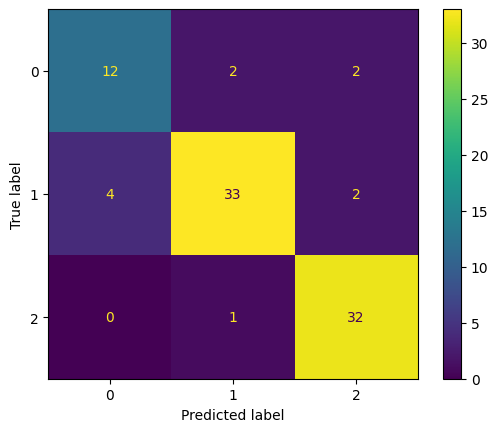

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()